In [1]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments__UB5hpk0iqg.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@JamesBond-j4b,This reviewer was so annoying,2024-11-04T22:26:27Z,0,1
1,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@ViktorAndy,Mentally preparing for GTA 6 reviews.,2024-10-21T16:40:12Z,0,0
2,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@francisoguah6950,Continue GTA V,2024-10-14T02:32:25Z,0,0
3,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@stonecoldsteverharvey7862,4 better,2024-10-13T11:49:51Z,0,0
4,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@Indy721,Still waiting on GTA 6 in 2024.\n2025 is suppo...,2024-10-01T02:48:10Z,0,1
...,...,...,...,...,...,...,...,...
9995,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@Djdkfks,This hasn't even the graphics from the GTA 4 P...,2013-09-16T16:36:04Z,0,0
9996,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@voiavictor,"and yet, on PC would look better",2013-09-16T16:36:03Z,0,0
9997,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@Kenny77557,Well now my hype level just went to the roof,2013-09-16T16:36:02Z,0,0
9998,https://www.youtube.com/watch?v=_UB5hpk0iqg,GTA 5 - Review,2013-09-16T14:26:01Z,@5005dave,The narrator sounds like an english teacher.,2013-09-16T16:35:55Z,0,0


In [3]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ig n', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','game',
    'grand','theft','played','yet','doesnt','mean','gta','mean',"gta", "review", 
    "annoying", "mentally", "preparing", "continue", "waiting", "better", "reviews", 
    "supposed", "2024", "2025","give","that's","one","look","guy", "thanks", "love", "bad", 
    "next", "woman", "come", "thats", "suck", "opinion", "want", "right",
   "fuck", "lol", "last", "wow", "finally", "gave", "also", "life", "haha", "girl"
])
lmtzr = WordNetLemmatizer()

In [4]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [5]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
4565,2013-09-23,Los Santos is IN San Andreas.,los santos san andreas
4566,2013-09-23,Well said.,said
4567,2013-09-23,"Actually, it is called Los Santos, BUT, the ar...",called los santos area inside los santos calle...
4568,2013-09-23,los santos is in san andreas smart guy,los santos san andreas smart guy
4569,2013-09-23,"hes just sad that there isnt a co op, which th...",he sad isnt couldnt using every bit resource c...
...,...,...,...
9995,2013-09-16,This hasn't even the graphics from the GTA 4 P...,hasnt graphic gta version game may awesome gra...
9996,2013-09-16,"and yet, on PC would look better",yet would look better
9997,2013-09-16,Well now my hype level just went to the roof,hype level went roof
9998,2013-09-16,The narrator sounds like an english teacher.,narrator sound like english teacher


In [6]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [7]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2013-09-19,atomic beam pls y u do dis,atomic beam pls dis,positive
1,2013-09-16,"If you preordered this game off the PS Store, ...",preordered game store anybody start downloading,neutral
2,2013-09-17,so what do you like cod/fifa or other overrate...,like codfifa overrated game,positive
3,2013-09-16,this comment should be posted on gamespot's re...,comment posted gamespots,neutral
4,2013-09-17,Bro if it's made by rockstar it's ok to have d...,bro rockstar drug nudity game problem,negative
...,...,...,...,...
495,2013-09-17,RIGHT!?!? Especially when this boy/girl gives ...,right especially boygirl give bad game happen ...,positive
496,2013-09-18,THAT GAME SUCKS! XD,game suck,negative
497,2013-09-16,Don't be stupid,stupid,negative
498,2013-09-16,"It's not how it looks, it's how it is played!",look played,positive


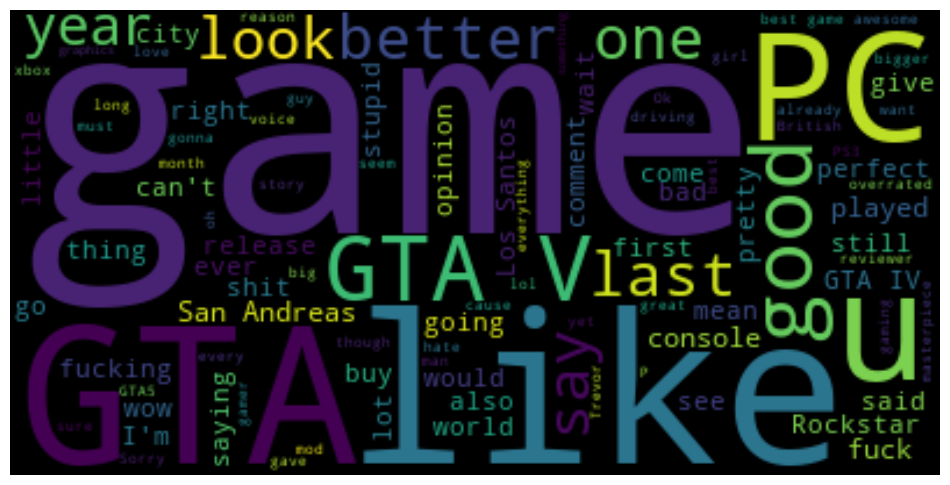

In [8]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

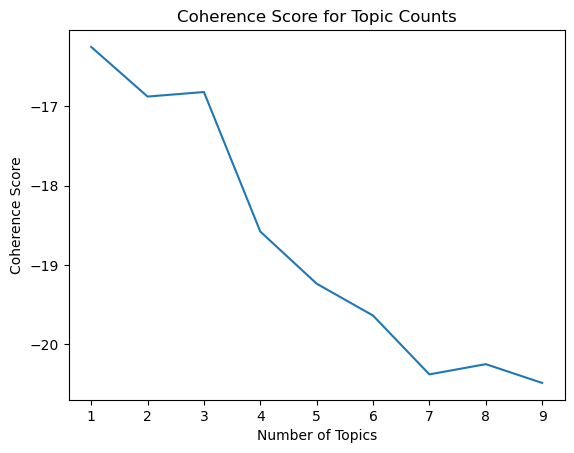

In [9]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [10]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 3
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.006*"overrated" + 0.005*"comment" + 0.004*"havent" + 0.004*"already" + 0.004*"shit" + 0.003*"see" + 0.003*"voice" + 0.003*"would" + 0.003*"ever" + 0.003*"stupid"'), (1, '0.008*"san" + 0.008*"andreas" + 0.007*"los" + 0.007*"santos" + 0.005*"city" + 0.005*"year" + 0.005*"best" + 0.005*"isnt" + 0.004*"british" + 0.004*"great"'), (2, '0.005*"perfect" + 0.005*"hate" + 0.004*"world" + 0.004*"bro" + 0.004*"release" + 0.004*"bigger" + 0.004*"talking" + 0.004*"wtf" + 0.004*"say" + 0.003*"dumb"')]


Based on this pattern, testing 3  topics might be ideal, as this range provides a balance between coherence and topic diversity. Specifically:
3 topics can capture broad themes while maintaining a relatively high coherence.

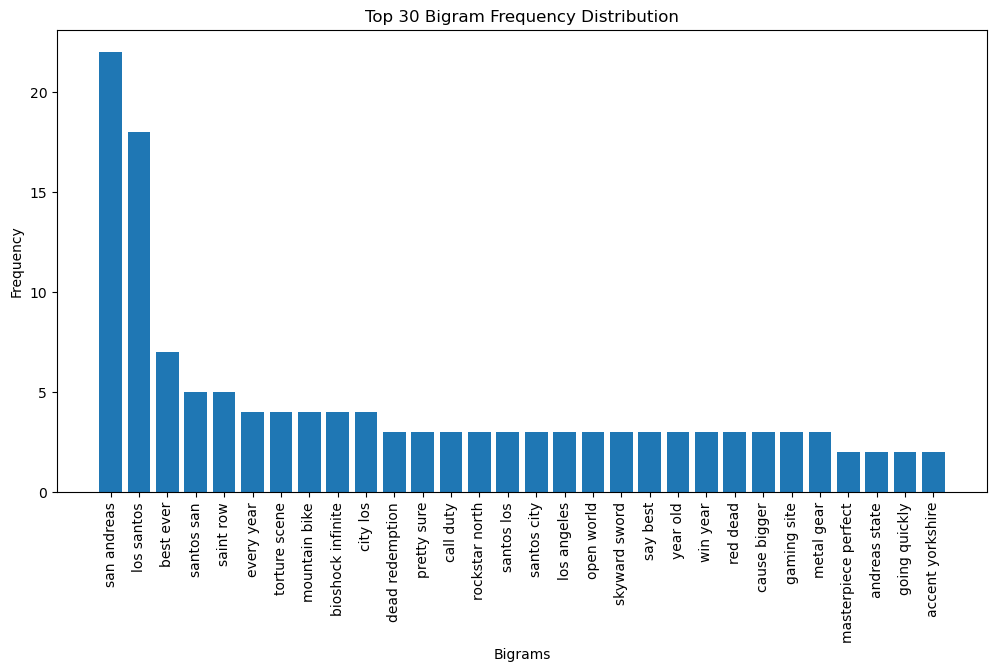

In [12]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [22]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
#Save the updated DataFrame back to the CSV file
df_good_topics.to_csv(file_path, index=False)
df_good_topics

,title,num_topics
0,GTA 5 - Review,3
